# Autocorrelation Analysis Example

Based on Aileen Nielsen's - Time Series Analysis Tutorial at PyCon 2017.

https://www.youtube.com/watch?v=zmfe2RaX-14

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools

%matplotlib inline

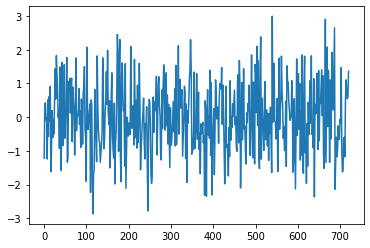

In [2]:
grid = np.linspace(0, 720, 500)
noise = np.random.randn(500)
plt.plot(grid, noise)
plt.show()

/Users/billtubbs/anaconda3/envs/tf/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


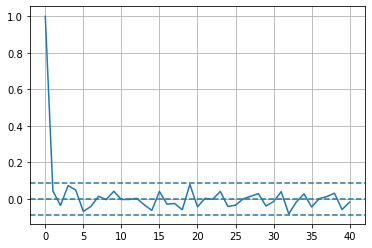

In [3]:
ts_data = noise
acf_result = stattools.acf(ts_data)
plt.plot(acf_result)

# Add 95% confidence intervals
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.grid()
plt.show()

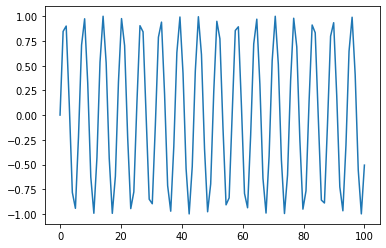

In [4]:
grid = np.linspace(0, 100, 100)
sin5 = np.sin(grid)
plt.plot(grid, sin5)
plt.show()

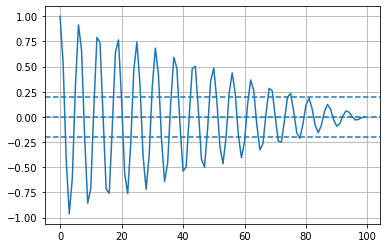

In [5]:
ts_data = sin5
acf_result = stattools.acf(ts_data, nlags=100)
plt.plot(acf_result)

# Add 95% confidence intervals
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.grid()

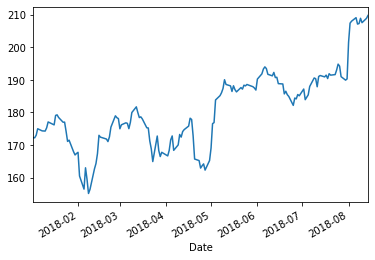

In [6]:
filepath = "data/quandl_data_AAPL.csv"
apple_stock_data = pd.read_csv(filepath)
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'])
apple_stock_data = apple_stock_data.set_index('Date')
apple_stock_price = apple_stock_data['Close'].loc['2018-01-01':'2018-12-31']
apple_stock_price.plot()
plt.show()

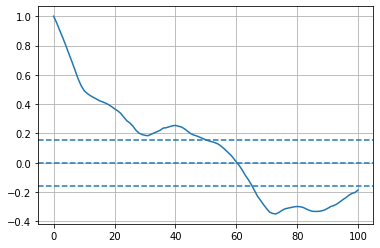

In [7]:
ts_data = apple_stock_price
acf_result = stattools.acf(ts_data, nlags=100)
plt.plot(acf_result)

# Add 95% confidence intervals
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.grid()

In [8]:
# You need to remove the trend from the data before you 
# can see anything interesting here...

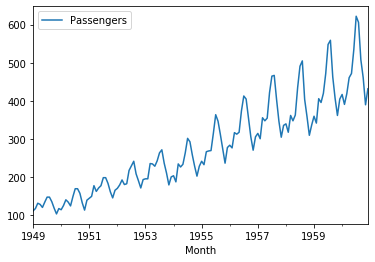

In [9]:
air_passengers = pd.read_csv("./data/AirPassengers.csv", header=0, 
                             parse_dates=[0], names=['Month', 'Passengers'],
                             index_col=0)
air_passengers.plot()
plt.show()

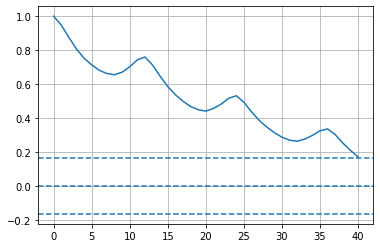

In [10]:
ts_data = air_passengers
acf_result = stattools.acf(ts_data)
plt.plot(acf_result)

# Add 95% confidence intervals
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.grid()

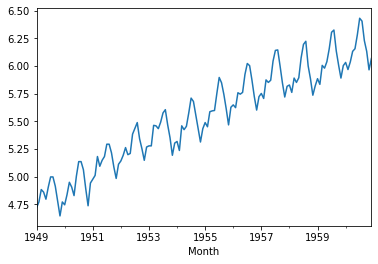

In [11]:
# De-trend the data
log_air_passengers = np.log(air_passengers.Passengers)
log_air_passengers.plot()
plt.show()

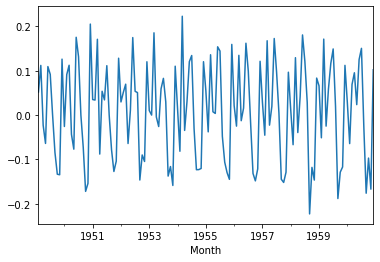

In [12]:
# Look at the difference
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()

# Overall goal is to make the data stationary
# I.e. constant variance and mean
log_air_passengers_diff.dropna(inplace=True)
log_air_passengers_diff.plot()
plt.show()

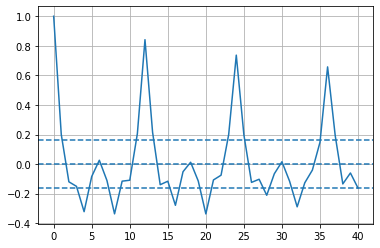

In [13]:
ts_data = log_air_passengers_diff
acf_result = stattools.acf(ts_data)
plt.plot(acf_result)

# Add 95% confidence intervals
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(ts_data)), linestyle='--')
plt.grid()

In [14]:
# 12, 24, ...etc. month periodicity shows the seasonal trends